In [1]:
import networkx as nx
import igraph as ig
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [13]:
G_nx = nx.read_edgelist('../data/Cit-HepPh.txt', create_using=nx.DiGraph)
G = ig.Graph.from_networkx(G_nx)

# Graph properties

In [61]:
print('number of nodes', nx.number_of_nodes(G_nx))
print('number of edges', nx.number_of_edges(G_nx))
print('number of selfloops', nx.number_of_selfloops(G_nx))
print('number of weakly connected components', nx.number_weakly_connected_components(G_nx))
print('number of strongly connected components', nx.number_strongly_connected_components(G_nx))
print('average clustering coefficient', nx.average_clustering(G_nx))
print('number of weak triangles', sum(nx.triangles(G_nx.to_undirected()).values())/3)
print('fraction of closed triads', nx.transitivity(G_nx))
print('density of graph', nx.density(G_nx))


"""
Just some quick code to get the in and out degrees of the graph
"""
a = sorted(in_degrees)
b = sorted(out_degrees)
c= 0
d= 0
for i in a:
    if i == 0:
        c+=1


for i in b:
    if i == 0:
        d+=1

print("Number of nodes with zero in-degree: ", c)
print("Number of nodes with zero out-degree: ", d)


print("Percentage of nodes with zero in-degree: ", c/len(in_degrees)*100,"%")
print("Percentage of nodes with zero out-degree: ", d/len(out_degrees)*100,"%")

number of nodes 34546
number of edges 421578
number of selfloops 44
number of weakly connected components 61
number of strongly connected components 21608
average clustering coefficient 0.14326383421252617
number of weak triangles 1276868.0
fraction of closed triads 0.10118914905026928
density of graph 0.00035326041393102855
Number of nodes with zero in-degree:  6316
Number of nodes with zero out-degree:  2388
Percentage of nodes with zero in-degree:  18.282869217854454 %
Percentage of nodes with zero out-degree:  6.912522433856308 %


#### Finding the nodes that have self-loops, and counting how many loops they have

In [62]:
nodes_with_selfloops = [edge.source for edge in G.es.select(lambda edge: edge.source == edge.target)]
self_loops_ids = [G.vs[i]["_nx_name"] for i in nodes_with_selfloops]

print(self_loops_ids)

self_loop_counts = {node: sum(1 for edge in G.es if edge.source == node and edge.target == node) for node in nodes_with_selfloops}

for node, count in self_loop_counts.items():
    print(f"Node {node}: {count} self-loop(s)")

['9803242', '6056', '108195', '9705442', '9807361', '102122', '9707481', '9701288', '9610527', '9907261', '201248', '9607208', '9612326', '9502380', '9409427', '2193', '9809337', '9405254', '9311294', '201291', '9312343', '5253', '9607359', '9605228', '9610448', '106319', '111193', '107254', '103101', '7349', '203041', '9807206', '212116', '9905499', '9612311', '9311351', '9702366', '212229', '206192', '302248', '210046', '9309327', '110207', '9903271']


# Degree distribution

In [65]:
# get list of in- and out-degrees
in_degrees = G.indegree()
out_degrees = G.outdegree()


print("Highest indegree: ", max(in_degrees))
print("Highest outdegree: ", max(out_degrees),"\n")

print("Lowest indegree: ", min(in_degrees))
print("Lowest outdegree: ", min(out_degrees),"\n")

print(f"Average in-degree: {np.mean(in_degrees)}")
print(f"Average out-degree: {np.mean(out_degrees)}")

Highest indegree:  846
Highest outdegree:  411 

Lowest indegree:  0
Lowest outdegree:  0 

Average in-degree: 12.203380999247381
Average out-degree: 12.203380999247381


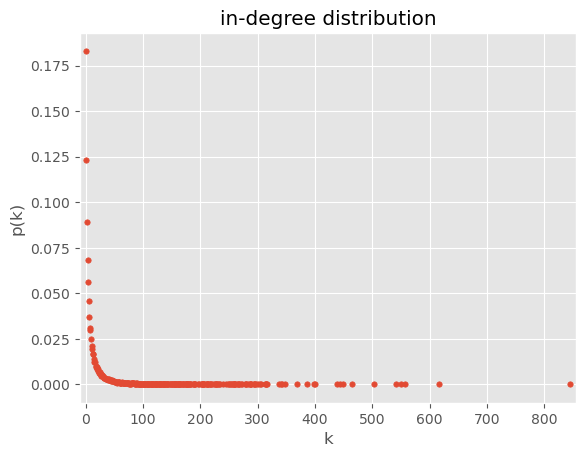

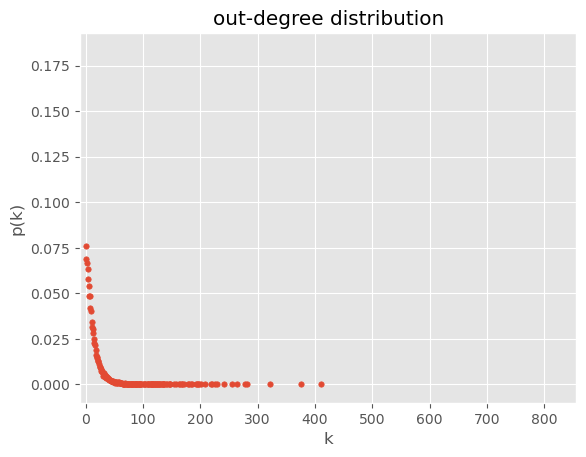

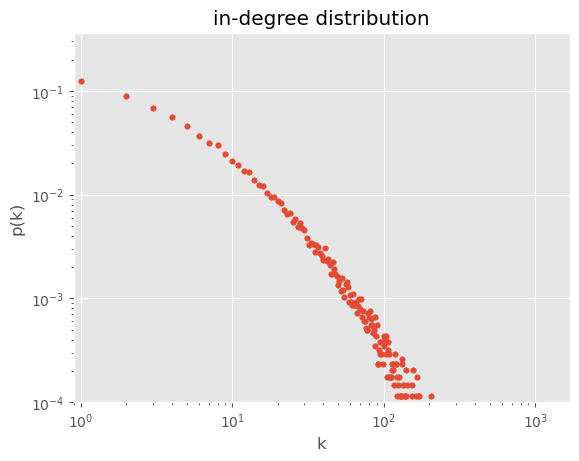

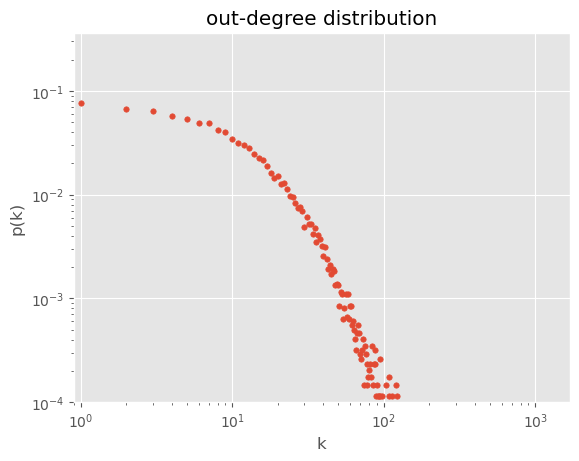

In [5]:
# get frequency of each degree and normalize to density
d_in, v_in = np.unique(in_degrees, return_counts=True)
v_in = v_in / v_in.sum()
d_out, v_out = np.unique(out_degrees, return_counts=True)
v_out = v_out / v_out.sum()

x_upper_bound = max(np.max(d_in), np.max(d_out))
y_upper_bound = max(np.max(v_in), np.max(v_out))

# setup figure for plotting
# fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,6))
dot_size = 15

# plot in-degree
fig, ax = plt.subplots()
ax.scatter(d_in, v_in, s=dot_size)
ax.set_xlabel('k')
ax.set_ylabel('p(k)')
ax.set_title('in-degree distribution')
ax.set_xlim(-10, x_upper_bound + 10)
ax.set_ylim(-0.01, y_upper_bound + 0.01)
fig.savefig('../figs/in-degree.svg')

# plot out-degree
fig, ax = plt.subplots()
ax.scatter(d_out, v_out, s=dot_size)
ax.set_xlabel('k')
ax.set_ylabel('p(k)')
ax.set_title('out-degree distribution')
ax.set_xlim(-10, x_upper_bound + 10)
ax.set_ylim(-0.01, y_upper_bound + 0.01)
fig.savefig('../figs/out-degree.svg')

# plot in-degree log-log
fig, ax = plt.subplots()
ax.scatter(d_in, v_in, s=dot_size)
ax.set_xlabel('k')
ax.set_ylabel('p(k)')
ax.set_title('in-degree distribution')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(0.9, x_upper_bound*2)
ax.set_ylim(0.0001, y_upper_bound*2)
fig.savefig('../figs/log-in-degree.svg')

# plot out-degree log-log
fig, ax = plt.subplots()
d_out, v_out = np.unique(out_degrees, return_counts=True)
v_out = v_out / v_out.sum()
ax.scatter(d_out, v_out, s=dot_size)
ax.set_xlabel('k')
ax.set_ylabel('p(k)')
ax.set_title('out-degree distribution')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(0.9, x_upper_bound*2)
ax.set_ylim(0.0001, y_upper_bound*2)
fig.savefig('../figs/log-out-degree.svg')

# plt.tight_layout()

C:\Users\marcu\AppData\Local\Temp/ipykernel_7492/3814117829.py:17: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(y_axis_lower_bound*2, 1.1)
C:\Users\marcu\AppData\Local\Temp/ipykernel_7492/3814117829.py:29: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(y_axis_lower_bound*2, 1.1)


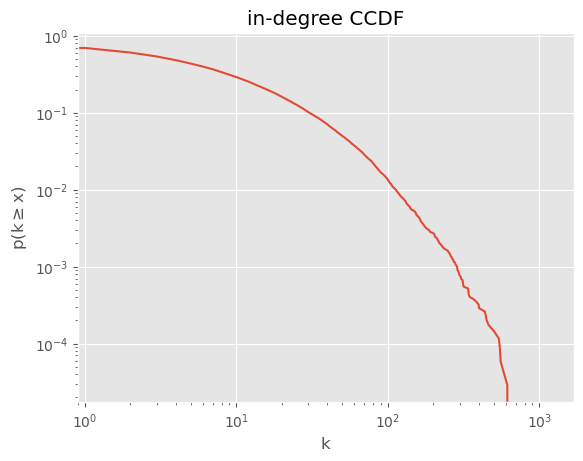

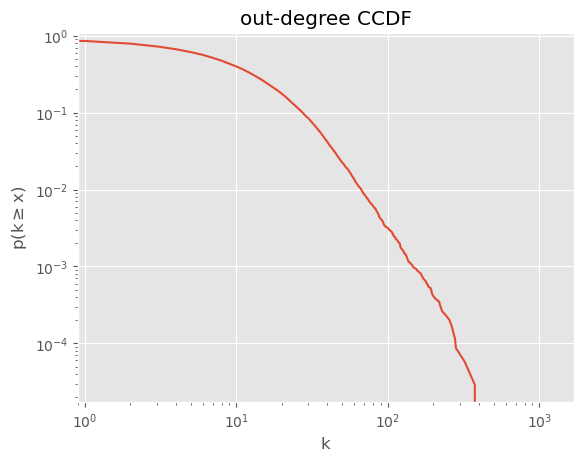

In [6]:
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,3))

# get complementray cumulative sum of degrees
v_in_cum = 1 - np.cumsum(v_in)
v_out_cum = 1 - np.cumsum(v_out)
y_axis_lower_bound = min(np.min(v_in_cum), np.min(v_out_cum))

# plot in-degree CCDF log-log
fig, ax = plt.subplots()
ax.plot(d_in, v_in_cum)
ax.set_title('in-degree CCDF')
ax.set_xlabel('k')
ax.set_ylabel('p(k$\geq$x)')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(0.9, x_upper_bound*2)
ax.set_ylim(y_axis_lower_bound*2, 1.1)
fig.savefig('../figs/in-degree-ccdf.svg')

# plot out-degree CCDF log-log
fig, ax = plt.subplots()
ax.plot(d_out, v_out_cum)
ax.set_title('out-degree CCDF')
ax.set_xlabel('k')
ax.set_ylabel('p(k$\geq$x)')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(0.9, x_upper_bound*2)
ax.set_ylim(y_axis_lower_bound*2, 1.1)
fig.savefig('../figs/out-degree-ccdf.svg')

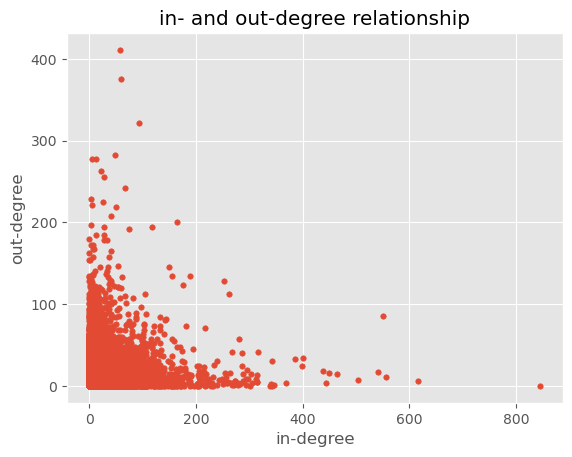

In [7]:
fig, ax = plt.subplots()
ax.scatter(in_degrees, out_degrees, s=dot_size)
ax.set_title('in- and out-degree relationship')
ax.set_xlabel('in-degree')
ax.set_ylabel('out-degree')
fig.savefig('../figs/in-out-degree.svg')

In [8]:
# degree assortativity
G.assortativity_degree(directed=True)

-0.002628226403824096

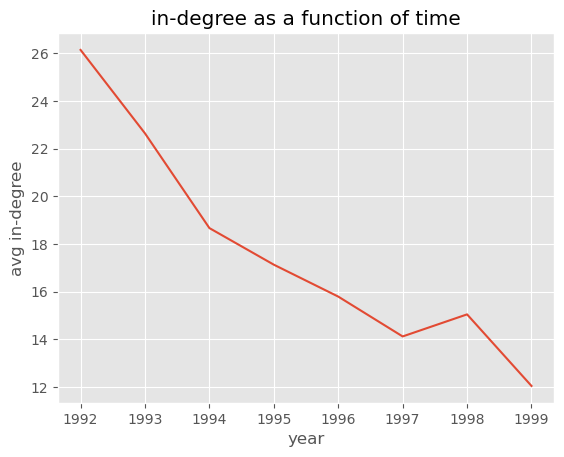

In [9]:
# in-degree as a funciton of time
# read in data
df = pd.read_csv('../data/Cit-HepPh-dates.txt', sep='\t', header=None, names=['node', 'date'])
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year

# get in-degree as a function of time
in_degrees = G.indegree()
in_degrees = pd.DataFrame({'node': G.vs['_nx_name'], 'in_degree': in_degrees})
in_degrees = in_degrees.merge(df, on='node', how='left')
in_degrees = in_degrees.groupby('year').agg({'in_degree': 'mean'}).reset_index()

# plot in-degree as a function of time
fig, ax = plt.subplots()
ax.plot(in_degrees['year'], in_degrees['in_degree'])
ax.set_xlabel('year')
ax.set_ylabel('avg in-degree')
ax.set_title('in-degree as a function of time')
fig.savefig('../figs/in-degree-time.svg')

# Relevant distributions
Various centrality measures are only computed on the largest component.

In [10]:
G_giant = G.components().giant()

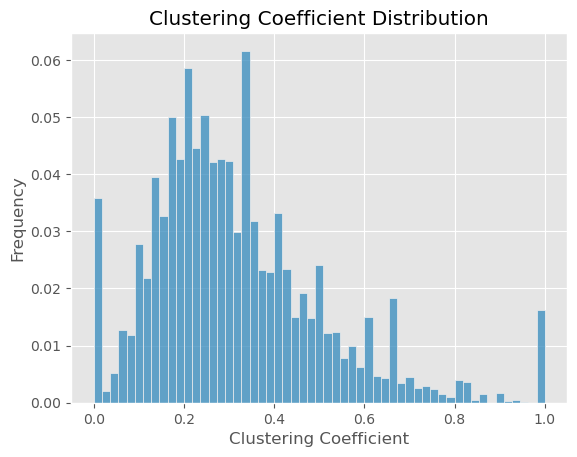

In [11]:
# clustering coefficient
clustering = G_giant.transitivity_local_undirected()

fig, ax = plt.subplots()
sns.histplot(clustering, stat='probability', ax=ax)
ax.set_title('Clustering Coefficient Distribution')
ax.set_xlabel('Clustering Coefficient')
ax.set_ylabel('Frequency')

fig.savefig('../figs/clustering.svg')


# slow nx version
# clustering = nx.clustering(G.to_undirected())

# fig, ax = plt.subplots()
# sns.histplot(list(clustering.values()), stat='probability', ax=ax)
# ax.set_title('Clustering Coefficient Distribution')
# ax.set_xlabel('Clustering Coefficient')
# ax.set_ylabel('Frequency')

average betweenness centrality 0.0010617365405204877


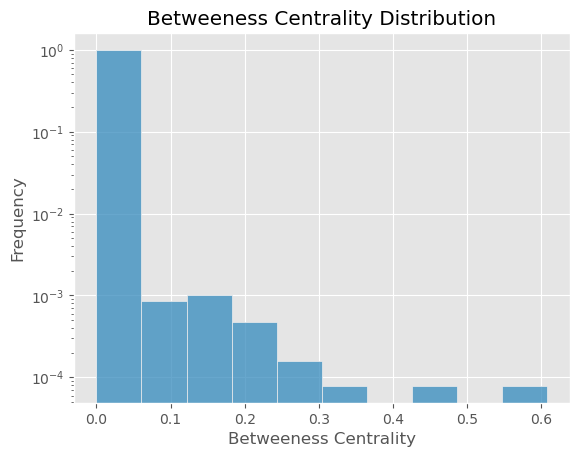

In [12]:
# betweenness centrality
betweenness = G_giant.betweenness()
betweenness = np.array(betweenness) / (G_giant.vcount() * (G_giant.vcount() - 1))

fig, ax = plt.subplots()
sns.histplot(betweenness, stat='probability', ax=ax, bins=10)
ax.set_title('Betweeness Centrality Distribution')
ax.set_xlabel('Betweeness Centrality')
ax.set_ylabel('Frequency')
ax.set_yscale('log')

fig.savefig('../figs/betweenness.svg')

print('average betweenness centrality', np.mean(betweenness))

average closeness centrality 0.24405294546059725


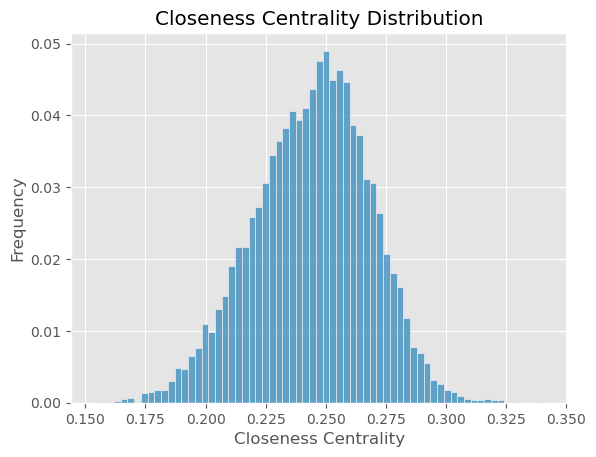

In [13]:
# closeness centrality
closeness = G_giant.closeness()

fig, ax = plt.subplots()
sns.histplot(closeness, stat='probability', ax=ax)
ax.set_title('Closeness Centrality Distribution')
ax.set_xlabel('Closeness Centrality')
ax.set_ylabel('Frequency')

fig.savefig('../figs/closeness.svg')

print('average closeness centrality', np.mean(closeness))

average pagerank 7.86720163637794e-05


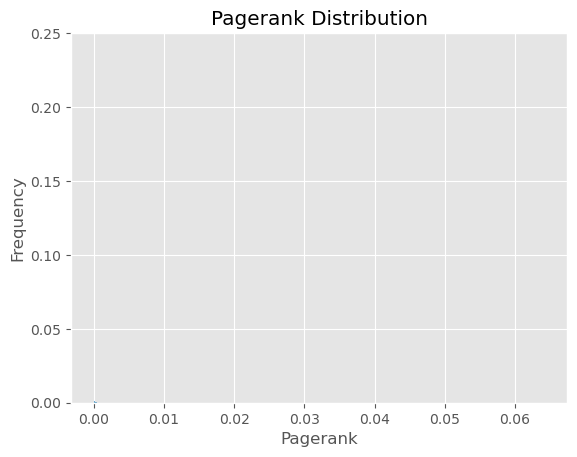

In [14]:
# pagerank
pagerank = G_giant.pagerank()

fig, ax = plt.subplots()
sns.histplot(pagerank, stat='probability', ax=ax)
ax.set_title('Pagerank Distribution')
ax.set_xlabel('Pagerank')
ax.set_ylabel('Frequency')

print('average pagerank', np.mean(pagerank))

# Cliques

In [15]:
# largest clique size
print(G_giant.clique_number())
# number of cliques of size N
print(len(G_giant.largest_cliques()))

18
122


C:\Users\marcu\AppData\Local\Temp/ipykernel_7492/3563460070.py:2: RuntimeWarning: Edge directions are ignored for maximal clique calculation at src/cliques/maximal_cliques.c:220
  print(G_giant.clique_number())
C:\Users\marcu\AppData\Local\Temp/ipykernel_7492/3563460070.py:4: RuntimeWarning: Edge directions are ignored for maximal clique calculation at src/cliques/maximal_cliques.c:220
  print(len(G_giant.largest_cliques()))


C:\Users\marcu\AppData\Local\Temp/ipykernel_7492/3936283733.py:1: RuntimeWarning: Edge directions are ignored for maximal clique calculation at src/cliques/maximal_cliques.c:220
  largest_cliques = G_giant.largest_cliques()


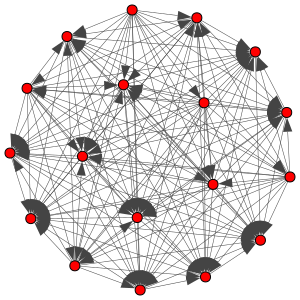

In [16]:
largest_cliques = G_giant.largest_cliques()
x = G_giant.subgraph(largest_cliques[0])
ig.plot(x, layout='kk', bbox=(0,0,300,300), vertex_size=10, vertex_label_size=0, edge_width=0.5, margin=10)

C:\Users\marcu\AppData\Local\Temp/ipykernel_7492/2679314086.py:2: RuntimeWarning: Edge directions are ignored for clique calculations at src/cliques/cliquer_wrapper.c:42
  cliques = G_giant.cliques(min=10, max=18)


Text(0.5, 1.0, 'clique size distribution')

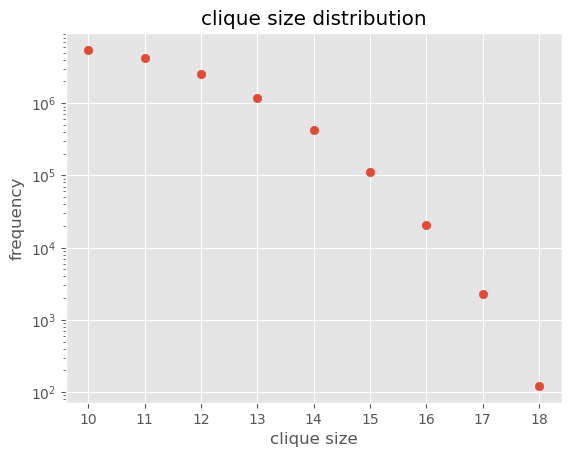

In [17]:
# clique size distribution
cliques = G_giant.cliques(min=10, max=18)

# get unique clique sizes and their frequencies
x, y = np.unique([len(clique) for clique in cliques], return_counts=True)

# plot clique size distribution
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.set_yscale('log')
ax.set_xlabel('clique size')
ax.set_ylabel('frequency')
ax.set_title('clique size distribution')

# Community detection

In [18]:
# import leidenalg as la
# communities = la.find_partition(G_ig, la.ModularityVertexPartition)
communities = G_giant.community_infomap()

In [19]:
G_giant.vs['community'] = communities.membership

In [20]:
G_giant.modularity(communities)

0.5238565086486645

# Graph summarization

In [21]:
# do graph aggregation based on communities

# Network visualization

0.0


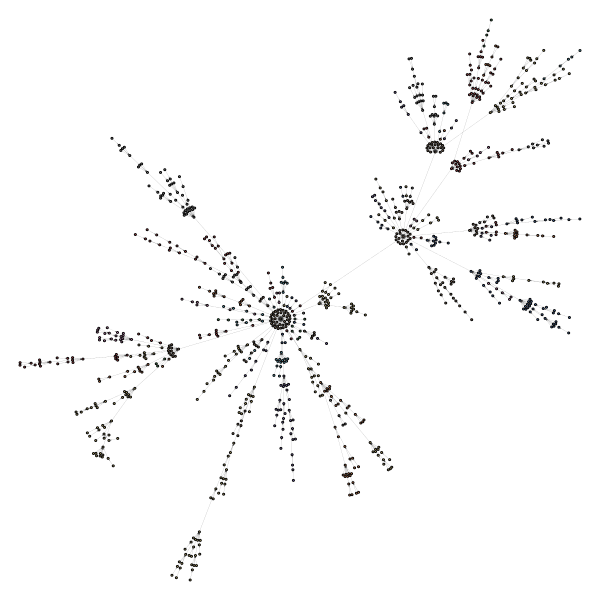

In [22]:
# layout = G_ig.components().giant().layout("fr")
G = ig.Graph.Barabasi(1000, directed=True)
# G = ig.Graph.Erdos_Renyi(1000, 0.01, directed=True)

print(G.transitivity_undirected())

communities = G.community_infomap()
G.vs['community'] = communities.membership

import random
num_communities = len(communities)
community_colors = [random.choice(sns.color_palette('deep')) for _ in range(num_communities)]
node_colors = [community_colors[community] for community in G.vs['community']]

G.vs['color'] = node_colors

layout = G.layout("fr")
ig.plot(G, layout=layout, vertex_size=2, vertex_label=None, edge_arrow_size=0.1, edge_width=0.1, color=G.vs['color'],
        target='test.svg')